In [87]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

# Reading excel file

In [88]:
data_file = pd.read_csv("Data_for_UCI_named.csv")  # read csv file

In [89]:
data_file

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376524,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [90]:
data_file.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [91]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

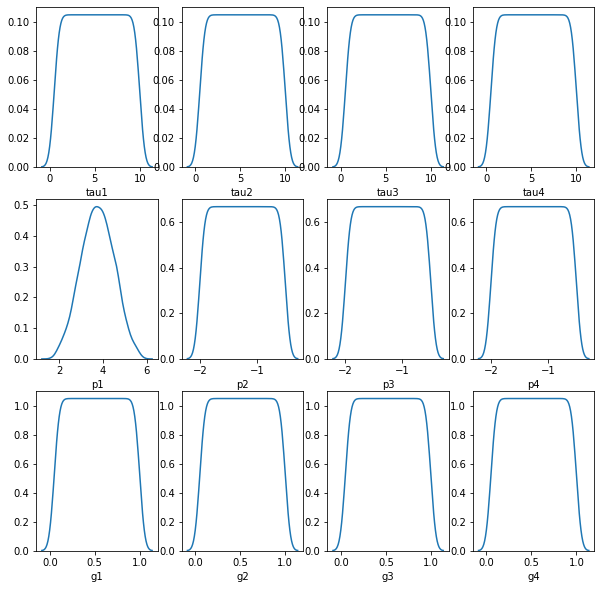

In [93]:
figure = plt.figure(figsize = (10,10))
column_list =list(data_file.columns[:-2])
for i, v in enumerate(column_list):
    figure.add_subplot(3, 4, i+1)
    sns.distplot(data_file[v], hist = False)         #plotting all the values 

In [95]:
# Seperated the target and data from each other
# target = stabf and data is all the data except stabf and stab
def preprocess_inputs(df, task='classification'):
    df = df.copy()
    
    if task == 'classification':
        df = df.drop('stab', axis=1)
        
        y = df['stabf'].copy()
        X = df.drop('stabf', axis=1).copy()
        
    elif task == 'regression':
        df = df.drop('stabf', axis=1)
        
        y = df['stab'].copy()
        X = df.drop('stab', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test

# CLASSIFICATION

In [96]:
# Train test splitting
X_train, X_test, y_train, y_test = preprocess_inputs(data_file, task='classification')

In [97]:
X_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254
2568,1.220072,8.804028,3.874283,8.433949,3.614027,-1.039236,-0.953566,-1.621224,0.908353,0.923594,0.238881,0.660156
3671,7.498402,6.697603,8.798626,2.126236,3.134585,-1.581906,-0.589386,-0.963293,0.260826,0.899003,0.964752,0.600598
7427,7.074006,1.337511,6.100756,7.759156,2.526922,-0.922540,-0.632600,-0.971782,0.984580,0.716082,0.836928,0.165162
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,9.504984,5.265415,2.029617,8.026334,3.449756,-0.922754,-1.526305,-1.000696,0.191864,0.611297,0.080008,0.350312
7813,8.035818,4.632548,1.177810,1.204950,4.093208,-1.568218,-0.819966,-1.705024,0.223384,0.317770,0.726623,0.441620
905,7.052560,3.264057,1.405949,4.497549,3.741358,-0.629026,-1.407945,-1.704387,0.868306,0.605566,0.100591,0.747320
5192,5.085242,1.790031,2.486392,2.848192,3.159670,-0.892898,-1.025461,-1.241311,0.473917,0.418512,0.326253,0.982488


In [98]:
y_train

2694    unstable
5140    unstable
2568    unstable
3671    unstable
7427    unstable
          ...   
2895      stable
7813      stable
905     unstable
5192    unstable
235       stable
Name: stabf, Length: 8000, dtype: object

# Stochastic Gradient Descent

In [99]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()                           
sgd_clf.fit(X_train, y_train)                 # fitting data

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
X_test[:5]       # Checking for first 5 test data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314


In [101]:
y_test           # Checking for first 5 test data labels

9953    unstable
3850    unstable
4962      stable
3886      stable
5437    unstable
          ...   
3919      stable
162       stable
7903      stable
2242    unstable
2745    unstable
Name: stabf, Length: 2000, dtype: object

In [102]:
sgd_clf.predict(X_test)       # Predicting first 5 test data labels

array(['unstable', 'unstable', 'stable', ..., 'unstable', 'stable',
       'unstable'], dtype='<U8')

In [103]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(sgd_clf, X_train,y_train, scoring ='roc_auc', cv=4)
score.mean()

0.881347713758724

In [104]:
y_pred = sgd_clf.predict(X_test)

In [105]:
confusion_matrix(y_test,y_pred)       # confusion matrix values

array([[ 539,  173],
       [ 252, 1036]], dtype=int64)

In [106]:
# precision score and recall score
precision_score(y_test,y_pred, pos_label="stable"), recall_score(y_test,y_pred, pos_label="stable")

(0.6814159292035398, 0.7570224719101124)

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      stable       0.68      0.76      0.72       712
    unstable       0.86      0.80      0.83      1288

    accuracy                           0.79      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.79      0.79      0.79      2000



# Support Vector Machines

In [108]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

C:\Users\17328\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [109]:
X_test[:5]        # Checking for first 5 test data 

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314


In [110]:
y_test[:5]     # Checking for first 5 test data

9953    unstable
3850    unstable
4962      stable
3886      stable
5437    unstable
Name: stabf, dtype: object

In [111]:
svm_clf.predict(X_test[:5])     # Predicting first 5 test data

array(['unstable', 'unstable', 'stable', 'stable', 'unstable'],
      dtype=object)

In [112]:
y_pred_svm = svm_clf.predict(X_test)      # predicting all test data

In [113]:
confusion_matrix(y_test, y_pred_svm)

array([[ 602,  110],
       [  61, 1227]], dtype=int64)

In [114]:
precision_score(y_test, y_pred_svm, pos_label = "stable"), recall_score(y_test, y_pred_svm, pos_label = "stable")

(0.9079939668174962, 0.8455056179775281)

In [115]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

      stable       0.91      0.85      0.88       712
    unstable       0.92      0.95      0.93      1288

    accuracy                           0.91      2000
   macro avg       0.91      0.90      0.91      2000
weighted avg       0.91      0.91      0.91      2000



# Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
gnb = GaussianNB()

In [118]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [119]:
X_test[:5]    # Checking for first 5 test data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314


In [120]:
y_test[:5]     # Checking for first 5 test data

9953    unstable
3850    unstable
4962      stable
3886      stable
5437    unstable
Name: stabf, dtype: object

In [121]:
gnb.predict(X_test[:5])    # Predicting first 5 test data

array(['unstable', 'unstable', 'stable', 'stable', 'unstable'],
      dtype='<U8')

In [122]:
y_pred_gnb = gnb.predict(X_test)    # Predicting all test data

In [123]:
confusion_matrix(y_test, y_pred_gnb)

array([[ 476,  236],
       [ 106, 1182]], dtype=int64)

In [124]:
precision_score(y_test, y_pred_gnb, pos_label = "stable"), recall_score(y_test, y_pred_gnb, pos_label = "stable")

(0.8178694158075601, 0.6685393258426966)

In [125]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

      stable       0.82      0.67      0.74       712
    unstable       0.83      0.92      0.87      1288

    accuracy                           0.83      2000
   macro avg       0.83      0.79      0.80      2000
weighted avg       0.83      0.83      0.82      2000



# Decision Trees

In [126]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [127]:
X_test[:5]      # Checking for first 5 test data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314


In [128]:
y_test[:5]      # Checking for first 5 test data

9953    unstable
3850    unstable
4962      stable
3886      stable
5437    unstable
Name: stabf, dtype: object

In [129]:
tree_clf.predict(X_test[:5])       # Predicting first 5 test data

array(['unstable', 'unstable', 'stable', 'stable', 'unstable'],
      dtype=object)

In [130]:
y_pred_tree = tree_clf.predict(X_test)  # Predicting all test data

In [131]:
confusion_matrix(y_test, y_pred_tree)

array([[ 576,  136],
       [ 144, 1144]], dtype=int64)

In [132]:
precision_score(y_test, y_pred_tree, pos_label = "stable"), recall_score(y_test, y_pred_tree, pos_label = "stable")

(0.8, 0.8089887640449438)

In [133]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

      stable       0.80      0.81      0.80       712
    unstable       0.89      0.89      0.89      1288

    accuracy                           0.86      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.86      0.86      0.86      2000



# K Nearest Neighbors

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [136]:
X_test[:5]         # Checking for first 5 test data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314


In [137]:
y_test[:5]     # Checking for first 5 test data

9953    unstable
3850    unstable
4962      stable
3886      stable
5437    unstable
Name: stabf, dtype: object

In [138]:
classifier.predict(X_test[:5])        # Predicting first 5 test data

array(['unstable', 'unstable', 'unstable', 'stable', 'unstable'],
      dtype=object)

In [139]:
y_pred_knn = classifier.predict(X_test)    # Predicting all test data

In [140]:
confusion_matrix(y_test, y_pred_knn)

array([[ 488,  224],
       [ 189, 1099]], dtype=int64)

In [141]:
precision_score(y_test, y_pred_knn, pos_label = "stable"), recall_score(y_test, y_pred_knn, pos_label = "stable")

(0.7208271787296898, 0.6853932584269663)

In [142]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

      stable       0.72      0.69      0.70       712
    unstable       0.83      0.85      0.84      1288

    accuracy                           0.79      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.79      0.79      0.79      2000



### In conclusion, it can be seen through the 5 predictive models that Decision tree is performing better than others due to overfitting

### Attributes and Distributions are evaluated 

### Confusion matrix , precision and recall score are calculated for all 5 models

### 1. Stochastic Gradient Descent
### 2. Support vector machines
### 3. Naive Bayes
### 4. Decision trees
### 5. Knn